In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
archivo = 'registroPrompts.xlsx'
# Leer cada hoja desde la segunda fila
df_gpt = pd.read_excel(archivo, sheet_name='GPT 1', skiprows=1)
df_gpt['modelo'] = 'GPT'

df_copilot = pd.read_excel(archivo, sheet_name='copilot 1', skiprows=1)
df_copilot['modelo'] = 'Copilot'

df_deepseek = pd.read_excel(archivo, sheet_name='seek 1', skiprows=1)
df_deepseek['modelo'] = 'DeepSeek'

df_gpt2 = pd.read_excel(archivo, sheet_name='GPT 2', skiprows=1)
df_gpt2['modelo'] = 'GPT'

df_copilot2 = pd.read_excel(archivo, sheet_name='copilot 2', skiprows=1)
df_copilot2['modelo'] = 'Copilot'

df_deepseek2 = pd.read_excel(archivo, sheet_name='seek 2', skiprows=1)
df_deepseek2['modelo'] = 'DeepSeek'

# dataframe de resultados iniciales de cada modelo con respecto a los prompts
df_generado = pd.concat([df_gpt, df_copilot, df_deepseek], ignore_index=True)

# dataframe de resultados de correciones realizadas por cada modelo con respecto a resultados iniciales
df_correccion = pd.concat([df_gpt2, df_copilot2, df_deepseek2], ignore_index=True)


df_generado.head()


,Caso,Lenguaje,CWE ID,OWASP Top 10 (2021),modelo
0,1,Python,CWE-256,A02:2021 - Cryptographic Failures,GPT
1,1,Python,CWE-327,A02:2021 - Cryptographic Failures,GPT
2,1,Python,CWE-187,A07:2021 - Identification and Authentication F...,GPT
3,1,Python,CWE-89,A03:2021 - Injection,GPT
4,1,Python,CWE-798,A07:2021 - Identification and Authentication F...,GPT


In [37]:
df_correccion.head()


,Caso,Lenguaje,CWE ID,OWASP Top 10 (2021),modelo
0,1,Python,CWE-522,A07:2021 - Identification and Authentication F...,GPT
1,1,Python,CWE-798,A07:2021 - Identification and Authentication F...,GPT
2,1,Python,CWE-89,A03:2021 - Injection,GPT
3,1,Python,CWE-285,A01:2021 - Broken Access Control,GPT
4,1,Python,CWE-307,A07:2021 - Identification and Authentication F...,GPT


In [71]:
df_generado['fase'] = 'inicial'
df_correccion['fase'] = 'correccion'

df_combinado = pd.concat([df_generado, df_correccion], ignore_index=True)

In [74]:
modelo_fase = df_combinado.groupby(['modelo', 'fase']).size().unstack(fill_value=0)
modelo_fase['reducido'] = modelo_fase['inicial'] - modelo_fase['correccion']
modelo_fase['% reducción'] = (modelo_fase['reducido'] / modelo_fase['inicial']) * 100
print(modelo_fase)

fase      correccion  inicial  reducido  % reducción
modelo                                              
Copilot          142      164        22    13.414634
DeepSeek         147      277       130    46.931408
GPT              121      162        41    25.308642


In [23]:
vuln_lenguaje_modelo = df_generado.groupby(['Lenguaje', 'modelo']).size().unstack(fill_value=0)
print(vuln_lenguaje_modelo)


modelo    Copilot  DeepSeek  GPT
Lenguaje                        
C              88       136   79
Python         76       141   83


In [ ]:
print("Inicial:", len(df_generado))
print("Después de corrección:", len(df_correccion))


Inicial: 603
Después de corrección: 410


In [ ]:
reducidas = len(df_generado) - len(df_correccion)
porcentaje = (reducidas / len(df_generado)) * 100

print(f"Vulnerabilidades eliminadas: {reducidas}")
print(f"Reducción porcentual: {porcentaje:.2f}%")


Vulnerabilidades eliminadas: 193
Reducción porcentual: 32.01%


In [75]:
lenguaje_fase = df_combinado.groupby(['Lenguaje', 'fase']).size().unstack(fill_value=0)
lenguaje_fase['reducido'] = lenguaje_fase['inicial'] - lenguaje_fase['correccion']
lenguaje_fase['% reducción'] = (lenguaje_fase['reducido'] / lenguaje_fase['inicial']) * 100
print(lenguaje_fase)


fase      correccion  inicial  reducido  % reducción
Lenguaje                                            
C                212      303        91    30.033003
Python           198      300       102    34.000000


In [61]:
vuln_promedio = df_generado.groupby(['modelo', 'Caso']).size().groupby('modelo').mean()
print(vuln_promedio)


modelo
Copilot     5.466667
DeepSeek    9.233333
GPT         5.400000
dtype: float64


In [63]:
vuln_promedio2 = df_correccion.groupby(['modelo', 'Caso']).size().groupby('modelo').mean()
print(vuln_promedio2)

modelo
Copilot     4.733333
DeepSeek    4.900000
GPT         4.033333
dtype: float64


In [ ]:
cwe_antes = set(df_generado['CWE ID'])
cwe_despues = set(df_correccion['CWE ID'])

comunes = cwe_antes & cwe_despues
nuevas = cwe_despues - cwe_antes
eliminadas = cwe_antes - cwe_despues

print("CWEs persistentes:", comunes)
print("CWEs nuevas tras corrección:", nuevas)
print("CWEs eliminadas:", eliminadas)


CWEs persistentes: {'CWE-120', 'CWE-326', 'CWE-614', 'CWE-676', 'CWE-134', 'CWE-404', 'CWE-319', 'CWE-117', 'CWE-311', 'CWE-321', 'CWE-489', 'CWE-359', 'CWE-662', 'CWE-209', 'CWE-200', 'CWE-367', 'CWE-538', 'CWE-89', 'CWE-79', 'CWE-532', 'CWE-170', 'CWE-377', 'CWE-125', 'CWE-862', 'CWE-94', 'CWE-787', 'CWE-78', 'CWE-126', 'CWE-330', 'CWE-307', 'CWE-276', 'CWE-829', 'CWE-918', 'CWE-285', 'CWE-22', 'CWE-352', 'CWE-190', 'CWE-778', 'CWE-345', 'CWE-1104', 'CWE-16', 'CWE-73', 'CWE-259', 'CWE-693', 'CWE-400', 'CWE-116', 'CWE-269', 'CWE-601', 'CWE-798', 'CWE-362', 'CWE-863', 'CWE-502', 'CWE-280', 'CWE-20', 'CWE-306', 'CWE-704', 'CWE-770', 'CWE-327', 'CWE-434', 'CWE-613', 'CWE-401', 'CWE-74', 'CWE-703', 'CWE-388', 'CWE-119', 'CWE-248', 'CWE-522', 'CWE-287', 'CWE-521', 'CWE-732', 'CWE-295', 'CWE-776'}
CWEs nuevas tras corrección: {'CWE-775', 'CWE-937', 'CWE-320', 'CWE-785', 'CWE-299', 'CWE-316', 'CWE-201', 'CWE-664', 'CWE-749', 'CWE-347', 'CWE-315', 'CWE-384', 'CWE-525', 'CWE-290', 'CWE-1284', 

In [ ]:
lenguajes = df_combinado['Lenguaje'].unique()

for lengua in lenguajes:
    cwe_inicial = set(df_generado[df_generado['Lenguaje'] == lengua]['CWE ID'])
    cwe_corr = set(df_correccion[df_correccion['Lenguaje'] == lengua]['CWE ID'])

    print(f"\nlengua: {lengua}")
    print("  Persistentes:", cwe_inicial & cwe_corr)
    print("  Corregidas:", cwe_inicial - cwe_corr)
    print("  Nuevas:", cwe_corr - cwe_inicial)




lengua: Python
  Persistentes: {'CWE-319', 'CWE-311', 'CWE-321', 'CWE-489', 'CWE-359', 'CWE-662', 'CWE-209', 'CWE-200', 'CWE-538', 'CWE-89', 'CWE-79', 'CWE-532', 'CWE-78', 'CWE-330', 'CWE-307', 'CWE-829', 'CWE-285', 'CWE-352', 'CWE-778', 'CWE-22', 'CWE-345', 'CWE-16', 'CWE-73', 'CWE-259', 'CWE-116', 'CWE-400', 'CWE-269', 'CWE-601', 'CWE-798', 'CWE-362', 'CWE-502', 'CWE-20', 'CWE-306', 'CWE-704', 'CWE-327', 'CWE-434', 'CWE-703', 'CWE-522', 'CWE-388', 'CWE-918', 'CWE-248', 'CWE-287', 'CWE-521', 'CWE-732', 'CWE-295', 'CWE-776'}
  Corregidas: {'CWE-120', 'CWE-611', 'CWE-614', 'CWE-676', 'CWE-134', 'CWE-284', 'CWE-933', 'CWE-59', 'CWE-367', 'CWE-147', 'CWE-1004', 'CWE-125', 'CWE-667', 'CWE-312', 'CWE-126', 'CWE-276', 'CWE-187', 'CWE-454', 'CWE-190', 'CWE-322', 'CWE-215', 'CWE-754', 'CWE-1333', 'CWE-77', 'CWE-863', 'CWE-922', 'CWE-280', 'CWE-256', 'CWE-412', 'CWE-476', 'CWE-242', 'CWE-391', 'CWE-119', 'CWE-250', 'CWE-787'}
  Nuevas: {'CWE-775', 'CWE-326', 'CWE-320', 'CWE-117', 'CWE-299', 'C

In [ ]:
modelos = df_combinado['modelo'].unique()

for modelo in modelos:
    cwe_inicial = set(df_generado[df_generado['modelo'] == modelo]['CWE ID'])
    cwe_corr = set(df_correccion[df_correccion['modelo'] == modelo]['CWE ID'])

    print(f"\nModelo: {modelo}")
    print("  Persistentes:", cwe_inicial & cwe_corr)
    print("  Corregidas:", cwe_inicial - cwe_corr)
    print("  Nuevas:", cwe_corr - cwe_inicial)



Modelo: GPT
  Persistentes: {'CWE-120', 'CWE-614', 'CWE-134', 'CWE-319', 'CWE-117', 'CWE-662', 'CWE-209', 'CWE-200', 'CWE-89', 'CWE-78', 'CWE-126', 'CWE-276', 'CWE-285', 'CWE-22', 'CWE-778', 'CWE-352', 'CWE-259', 'CWE-269', 'CWE-798', 'CWE-362', 'CWE-502', 'CWE-20', 'CWE-306', 'CWE-327', 'CWE-434', 'CWE-703', 'CWE-522', 'CWE-287', 'CWE-400', 'CWE-119', 'CWE-732', 'CWE-295'}
  Corregidas: {'CWE-611', 'CWE-676', 'CWE-404', 'CWE-284', 'CWE-252', 'CWE-772', 'CWE-933', 'CWE-79', 'CWE-532', 'CWE-1004', 'CWE-187', 'CWE-73', 'CWE-215', 'CWE-754', 'CWE-601', 'CWE-863', 'CWE-922', 'CWE-256', 'CWE-476', 'CWE-248', 'CWE-918', 'CWE-250', 'CWE-776'}
  Nuevas: {'CWE-775', 'CWE-326', 'CWE-280', 'CWE-311', 'CWE-489', 'CWE-384', 'CWE-330', 'CWE-307', 'CWE-785', 'CWE-521', 'CWE-916', 'CWE-1284', 'CWE-367', 'CWE-358'}

Modelo: Copilot
  Persistentes: {'CWE-120', 'CWE-134', 'CWE-404', 'CWE-319', 'CWE-117', 'CWE-311', 'CWE-321', 'CWE-489', 'CWE-359', 'CWE-200', 'CWE-538', 'CWE-79', 'CWE-532', 'CWE-78', 'CW

In [91]:
gpt_cwe = set(df_combinado[df_combinado['modelo'] == 'GPT']['CWE ID'])
copilot_cwe = set(df_combinado[df_combinado['modelo'] == 'Copilot']['CWE ID'])
deepseek_cwe = set(df_combinado[df_combinado['modelo'] == 'DeepSeek']['CWE ID'])

comunes = gpt_cwe & copilot_cwe & deepseek_cwe
solo_gpt = gpt_cwe - (copilot_cwe | deepseek_cwe)
solo_copilot = copilot_cwe - (gpt_cwe | deepseek_cwe)
solo_deepseek = deepseek_cwe - (gpt_cwe | copilot_cwe)

print("CWEs comunes:", comunes)
print("CWEs solo GPT:", solo_gpt)
print("CWEs solo Copilot:", solo_copilot)
print("CWEs solo DeepSeek:", solo_deepseek)


CWEs comunes: {'CWE-120', 'CWE-326', 'CWE-676', 'CWE-134', 'CWE-319', 'CWE-311', 'CWE-489', 'CWE-209', 'CWE-200', 'CWE-89', 'CWE-79', 'CWE-532', 'CWE-78', 'CWE-126', 'CWE-918', 'CWE-307', 'CWE-285', 'CWE-22', 'CWE-778', 'CWE-352', 'CWE-73', 'CWE-259', 'CWE-798', 'CWE-362', 'CWE-502', 'CWE-20', 'CWE-306', 'CWE-256', 'CWE-327', 'CWE-434', 'CWE-703', 'CWE-522', 'CWE-119', 'CWE-400', 'CWE-287', 'CWE-295'}
CWEs solo GPT: {'CWE-775', 'CWE-611', 'CWE-252', 'CWE-772', 'CWE-933', 'CWE-384', 'CWE-187', 'CWE-250', 'CWE-1284', 'CWE-358'}
CWEs solo Copilot: {'CWE-538', 'CWE-704', 'CWE-937', 'CWE-664', 'CWE-116', 'CWE-667', 'CWE-321', 'CWE-74', 'CWE-829', 'CWE-388', 'CWE-77', 'CWE-59'}
CWEs solo DeepSeek: {'CWE-320', 'CWE-338', 'CWE-147', 'CWE-299', 'CWE-170', 'CWE-377', 'CWE-862', 'CWE-125', 'CWE-316', 'CWE-1275', 'CWE-454', 'CWE-322', 'CWE-1104', 'CWE-201', 'CWE-16', 'CWE-749', 'CWE-693', 'CWE-347', 'CWE-315', 'CWE-1333', 'CWE-525', 'CWE-290', 'CWE-412', 'Corrección completa', 'CWE-1021', 'CWE-613

In [ ]:
owasp_antes = set(df_generado['OWASP Top 10 (2021)'])
owasp_despues = set(df_correccion['OWASP Top 10 (2021)'])

owasp_persistentes = owasp_antes & owasp_despues
owasp_nuevas = owasp_despues - owasp_antes
owasp_eliminadas = owasp_antes - owasp_despues

print("Categorías OWASP persistentes:", owasp_persistentes)
print("Nuevas tras corrección:", owasp_nuevas)
print("Eliminadas:", owasp_eliminadas)


Categorías OWASP persistentes: {'A06:2021 - Vulnerable and Outdated Components', 'No aplica', 'A04:2021 - Insecure Design', 'A03:2021 - Injection', 'A09:2021 - Security Logging and Monitoring Failures', 'A07:2021 - Identification and Authentication Failures', 'A01:2021 - Broken Access Control', 'A08:2021 - Software and Data Integrity Failures', 'A10:2021 - Server-Side Request Forgery (SSRF)', 'A05:2021 - Security Misconfiguration', 'A02:2021 - Cryptographic Failures'}
Nuevas tras corrección: {'Corrección completa'}
Eliminadas: {'A06:2021 - Vulnerability Disclosure', 'A10:2021 - Server-Side Request Forgery'}


In [81]:
owasp_modelo_fase = df_combinado.groupby(['modelo', 'fase', 'OWASP Top 10 (2021)']).size().unstack(fill_value=0)
(owasp_modelo_fase)


OWASP Top 10 (2021)  A01:2021 - Broken Access Control  \
modelo   fase                                           
Copilot  correccion                                22   
         inicial                                   29   
DeepSeek correccion                                29   
         inicial                                   58   
GPT      correccion                                22   
         inicial                                   36   

OWASP Top 10 (2021)  A02:2021 - Cryptographic Failures  A03:2021 - Injection  \
modelo   fase                                                                  
Copilot  correccion                                  8                     9   
         inicial                                    18                    14   
DeepSeek correccion                                 11                     8   
         inicial                                    24                    26   
GPT      correccion                                 10                     6   
         inicial                                    11                    12   

OWASP Top 10 (2021)  A04:2021 - Insecure Design  \
modelo   fase                                     
Copilot  correccion                           0   
         inicial                              0   
DeepSeek correccion                           0   
         inicial                              1   
GPT      correccion                           2   
         inicial                              1   

OWASP Top 10 (2021)  A05:2021 - Security Misconfiguration  \
modelo   fase                                               
Copilot  correccion                                    21   
         inicial                                       24   
DeepSeek correccion                                    21   
         inicial                                       37   
GPT      correccion                                    14   
         inicial                                       59   

OWASP Top 10 (2021)  A06:2021 - Vulnerability Disclosure  \
modelo   fase                                              
Copilot  correccion                                    0   
         inicial                                       0   
DeepSeek correccion                                    0   
         inicial                                       1   
GPT      correccion                                    0   
         inicial                                       0   

OWASP Top 10 (2021)  A06:2021 - Vulnerable and Outdated Components  \
modelo   fase                                                        
Copilot  correccion                                              2   
         inicial                                                 0   
DeepSeek correccion                                              2   
         inicial                                                 4   
GPT      correccion                                              5   
         inicial                                                 3   

OWASP Top 10 (2021)  A07:2021 - Identification and Authentication Failures  \
modelo   fase                                                                
Copilot  correccion                                                 11       
         inicial                                                     9       
DeepSeek correccion                                                 15       
         inicial                                                    20       
GPT      correccion                                                 19       
         inicial                                                    12       

OWASP Top 10 (2021)  A08:2021 - Software and Data Integrity Failures  \
modelo   fase                                                          
Copilot  correccion                                                6   
         inicial                                                   9   
DeepSeek correccion                              

In [ ]:
cwe_distribucion = df_generado.groupby(['modelo', 'CWE ID']).size().unstack(fill_value=0)
cwe_distribucion


CWE ID,CWE-1004,CWE-1104,CWE-116,CWE-117,CWE-119,CWE-120,CWE-125,CWE-126,CWE-1275,CWE-1333,...,CWE-79,CWE-798,CWE-829,CWE-862,CWE-863,CWE-89,CWE-918,CWE-922,CWE-933,CWE-94
modelo,,,,,,,,,,,,,,,,,,,,,
Copilot,0,0,1,1,10,15,0,5,0,0,...,2,3,1,0,0,6,1,0,0,0
DeepSeek,1,1,0,0,13,20,2,6,1,1,...,4,9,0,1,1,9,0,1,0,1
GPT,1,0,0,1,12,10,0,3,0,0,...,1,3,0,0,1,5,1,2,1,0


In [76]:
cwe_distribucion = df_generado.groupby(['Lenguaje', 'CWE ID']).size().unstack(fill_value=0)
cwe_distribucion


CWE ID,CWE-1004,CWE-1104,CWE-116,CWE-117,CWE-119,CWE-120,CWE-125,CWE-126,CWE-1275,CWE-1333,...,CWE-79,CWE-798,CWE-829,CWE-862,CWE-863,CWE-89,CWE-918,CWE-922,CWE-933,CWE-94
Lenguaje,,,,,,,,,,,,,,,,,,,,,
C,1,1,0,2,27,32,1,12,1,0,...,3,4,0,1,1,11,1,1,0,1
Python,1,0,1,0,8,13,1,2,0,1,...,4,11,1,0,1,9,1,2,1,0


In [92]:
    top_cwe_modelo = df_combinado.groupby(['modelo', 'CWE ID']).size().reset_index(name='Frecuencia')
    top10 = top_cwe_modelo.groupby('modelo').apply(lambda x: x.sort_values('Frecuencia', ascending=False).head(10))
    (top10.reset_index(drop=True))


C:\Users\Josue\AppData\Local\Temp\ipykernel_23688\3064418682.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10 = top_cwe_modelo.groupby('modelo').apply(lambda x: x.sort_values('Frecuencia', ascending=False).head(10))


,modelo,CWE ID,Frecuencia
0,Copilot,CWE-20,32
1,Copilot,CWE-120,28
2,Copilot,CWE-119,23
3,Copilot,CWE-362,20
4,Copilot,CWE-126,13
5,Copilot,CWE-22,9
6,Copilot,CWE-319,8
7,Copilot,CWE-78,8
8,Copilot,CWE-522,8
9,Copilot,CWE-306,7


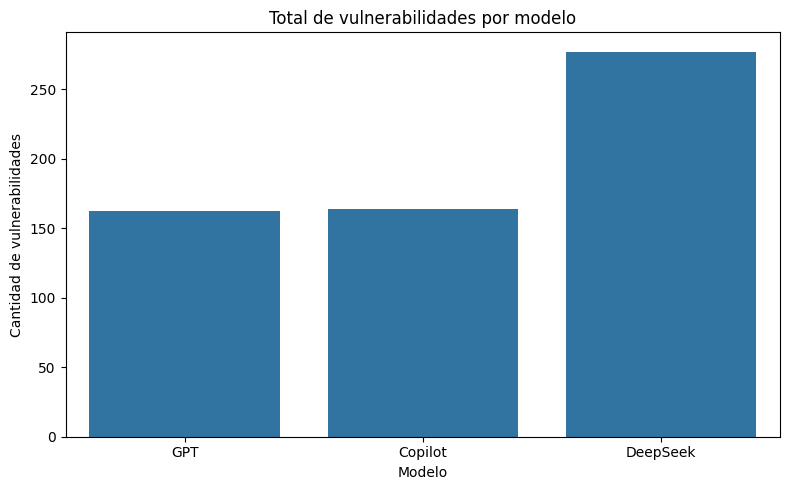

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_generado, x='modelo')
plt.title("Total de vulnerabilidades por modelo")
plt.xlabel("Modelo")
plt.ylabel("Cantidad de vulnerabilidades")
plt.tight_layout()
plt.show()


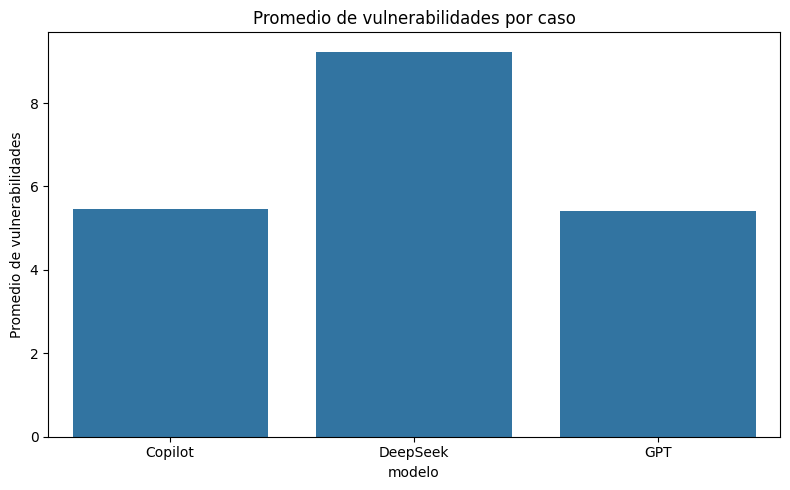

In [ ]:
vuln_por_caso = df_generado.groupby(['modelo', 'Caso']).size().groupby('modelo').mean()

# Convertir a DataFrame para graficar
vuln_por_caso_df = vuln_por_caso.reset_index(name='Promedio')

plt.figure(figsize=(8, 5))
sns.barplot(data=vuln_por_caso_df, x='modelo', y='Promedio')
plt.title("Promedio de vulnerabilidades por caso")
plt.ylabel("Promedio de vulnerabilidades")
plt.tight_layout()
plt.show()

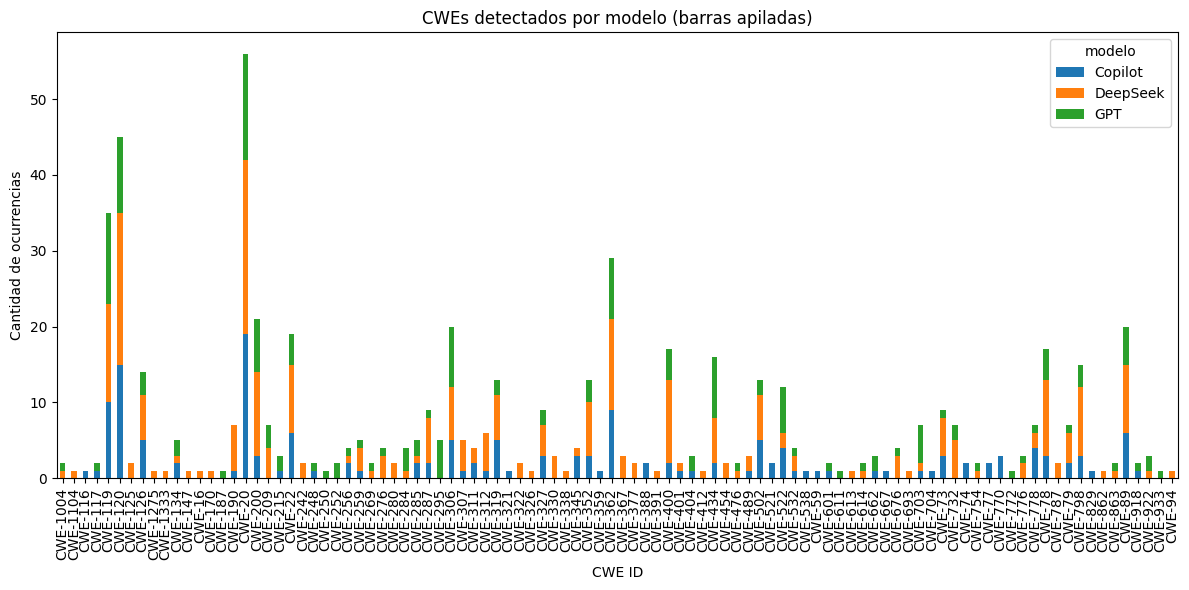

In [10]:
cwe_distribucion.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("CWEs detectados por modelo (barras apiladas)")
plt.ylabel("Cantidad de ocurrencias")
plt.xlabel("CWE ID")
plt.tight_layout()
plt.show()


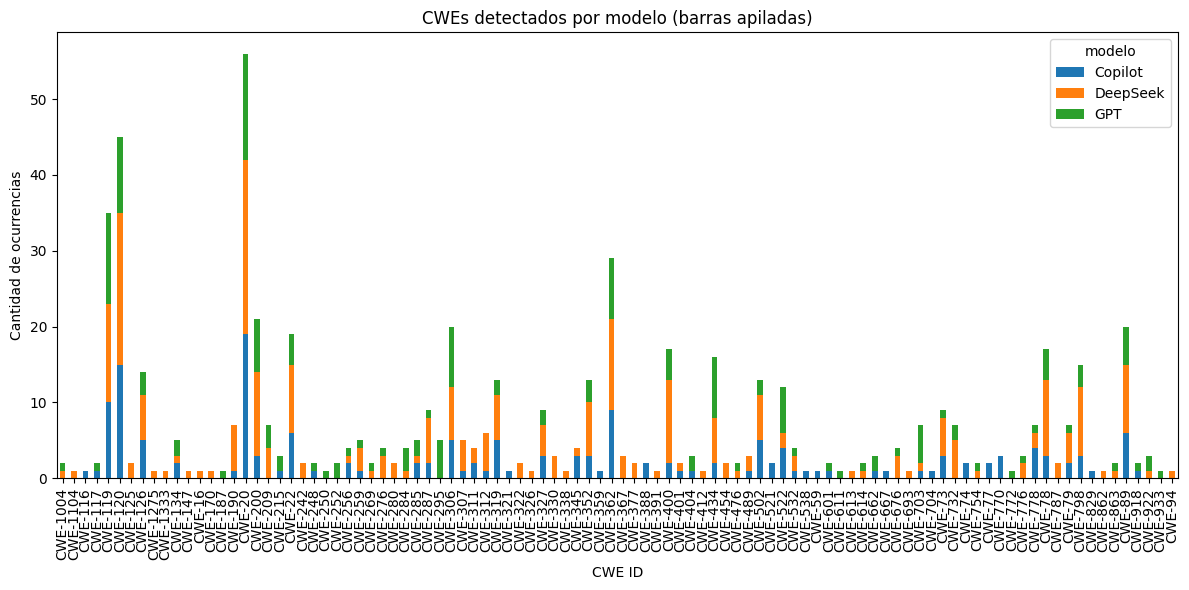

In [11]:
cwe_distribucion.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("CWEs detectados por modelo (barras apiladas)")
plt.ylabel("Cantidad de ocurrencias")
plt.xlabel("CWE ID")
plt.tight_layout()
plt.show()

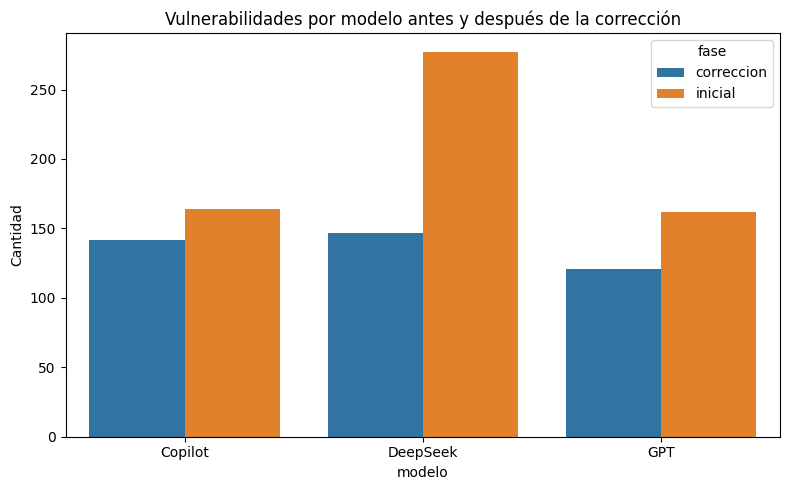

In [93]:
modelo_fase = df_combinado.groupby(['modelo', 'fase']).size().reset_index(name='conteo')

plt.figure(figsize=(8, 5))
sns.barplot(data=modelo_fase, x='modelo', y='conteo', hue='fase')
plt.title('Vulnerabilidades por modelo antes y después de la corrección')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()


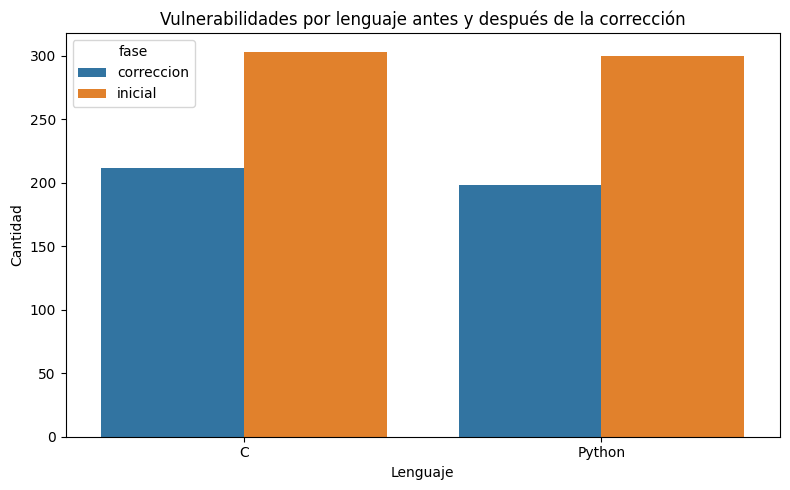

In [94]:
lenguaje_fase = df_combinado.groupby(['Lenguaje', 'fase']).size().reset_index(name='conteo')

plt.figure(figsize=(8, 5))
sns.barplot(data=lenguaje_fase, x='Lenguaje', y='conteo', hue='fase')
plt.title('Vulnerabilidades por lenguaje antes y después de la corrección')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()


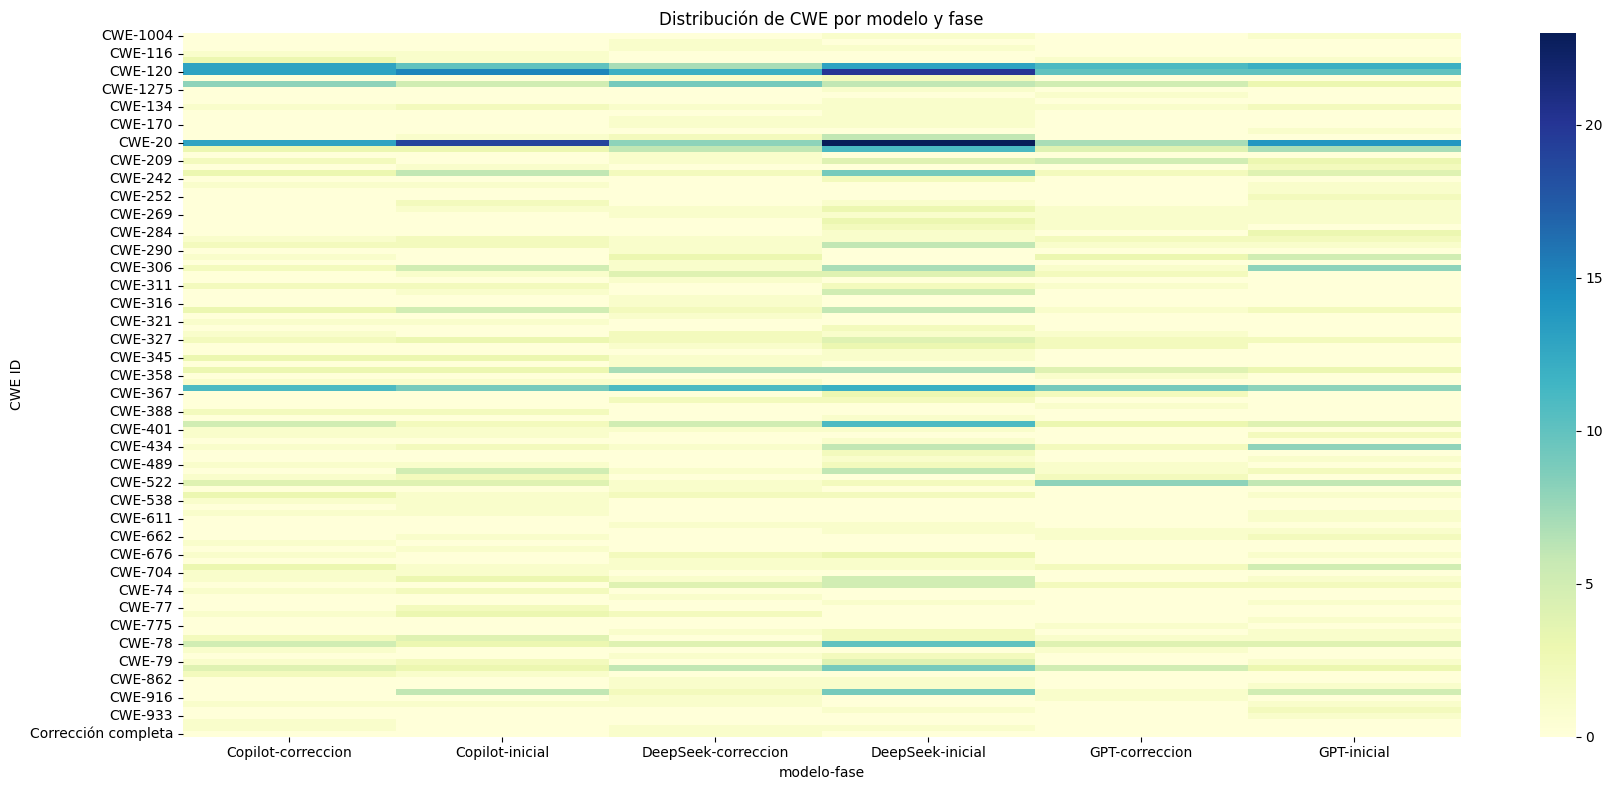

In [106]:
cwe_heatmap = df_combinado.groupby(['modelo', 'fase', 'CWE ID']).size().reset_index(name='conteo')
pivot_cwe = cwe_heatmap.pivot_table(index='CWE ID', columns=['modelo', 'fase'], values='conteo', fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(pivot_cwe, cmap='YlGnBu', annot=False, fmt='.0f')
plt.title('Distribución de CWE por modelo y fase')
plt.tight_layout()
plt.show()


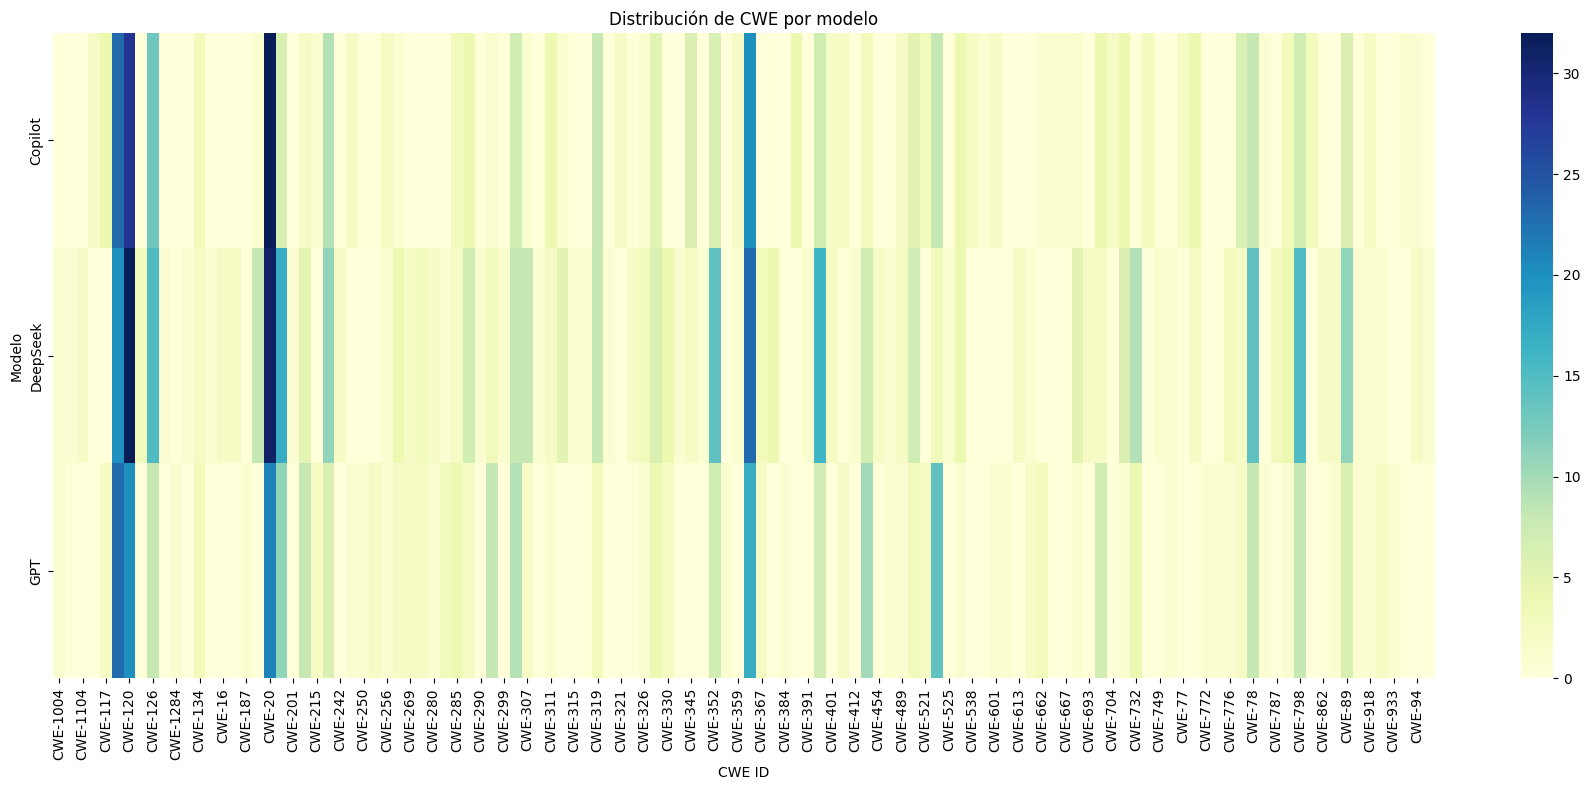

In [105]:
cwe_distribucion = df_combinado.groupby(['modelo', 'CWE ID']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(cwe_distribucion, annot=False, fmt="d", cmap="YlGnBu")
plt.title("Distribución de CWE por modelo")
plt.xlabel("CWE ID")
plt.ylabel("Modelo")
plt.tight_layout()
plt.show()


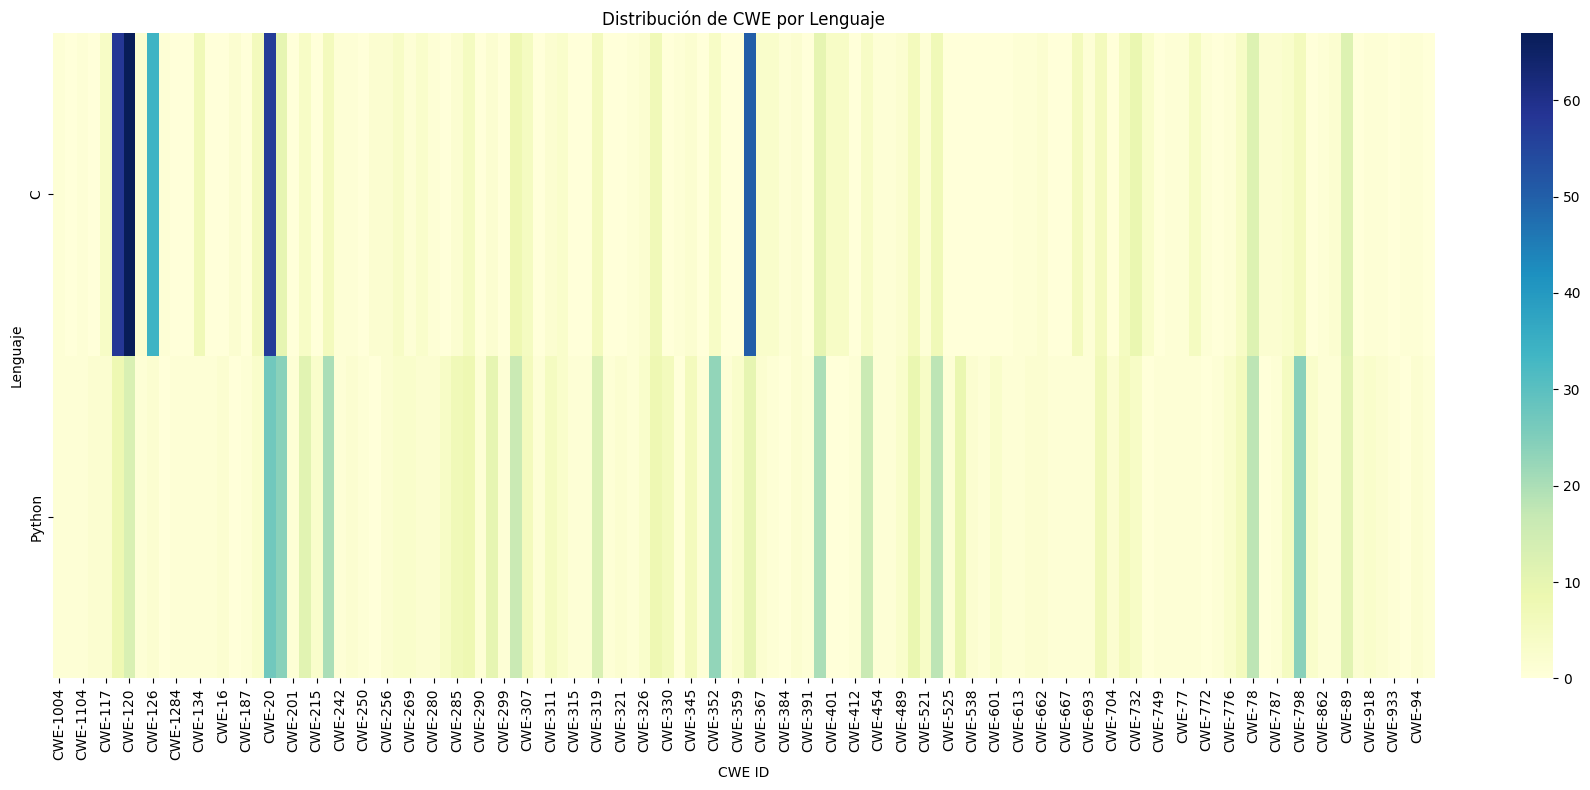

In [107]:
cwe_distribucion = df_combinado.groupby(['Lenguaje', 'CWE ID']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(cwe_distribucion, annot=False, fmt="d", cmap="YlGnBu")
plt.title("Distribución de CWE por Lenguaje")
plt.xlabel("CWE ID")
plt.ylabel("Lenguaje")
plt.tight_layout()
plt.show()


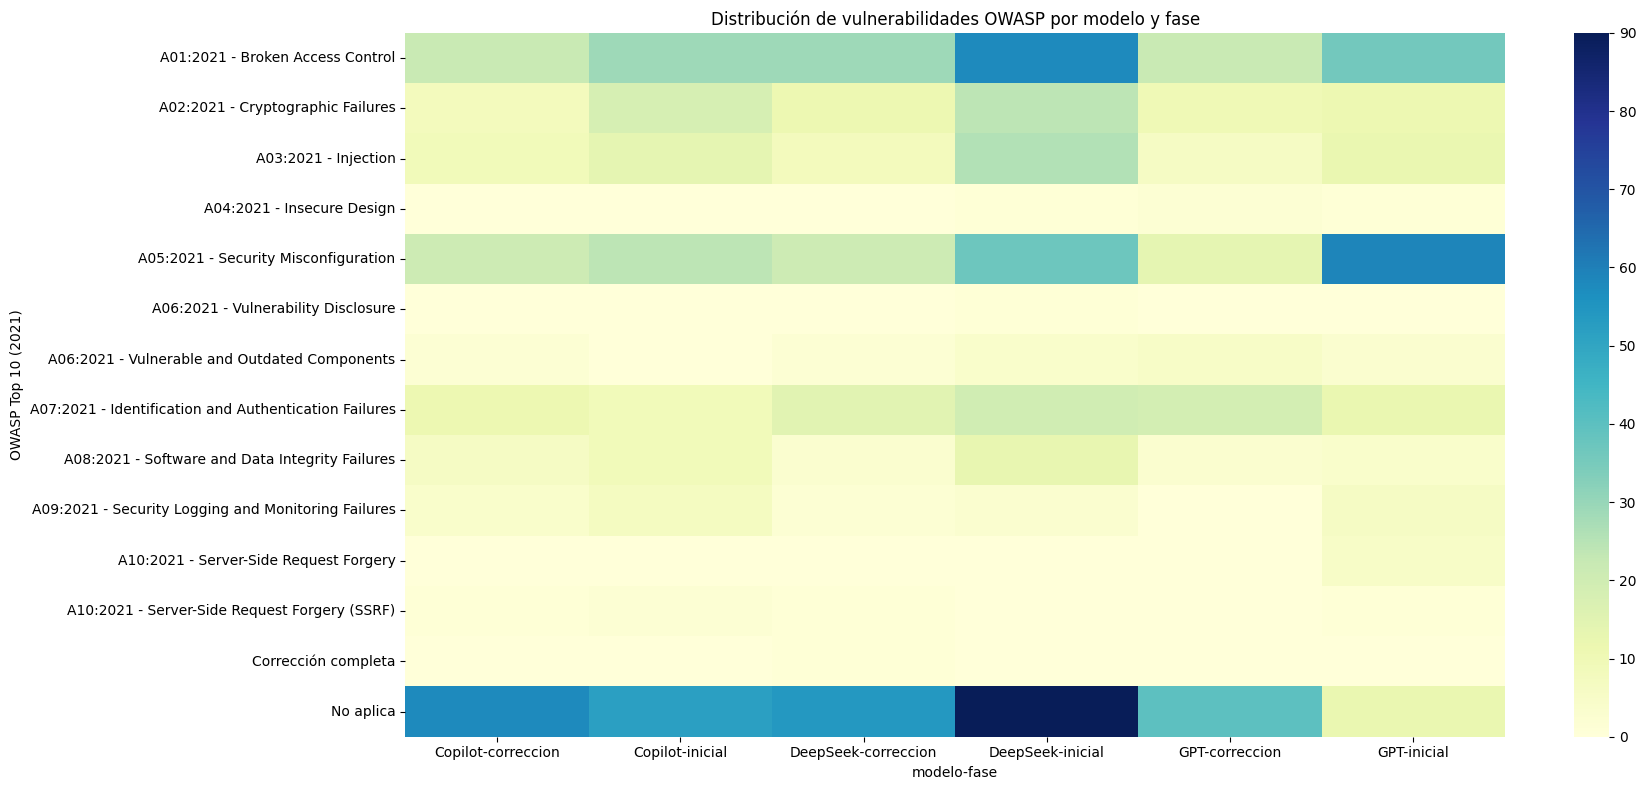

In [110]:
owasp_heatmap = df_combinado.groupby(['modelo', 'fase', 'OWASP Top 10 (2021)']).size().reset_index(name='conteo')
pivot_owasp = owasp_heatmap.pivot_table(index='OWASP Top 10 (2021)', columns=['modelo', 'fase'], values='conteo', fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(pivot_owasp, cmap='YlGnBu', annot=False, fmt='.0f')
plt.title('Distribución de vulnerabilidades OWASP por modelo y fase')
plt.tight_layout()
plt.show()


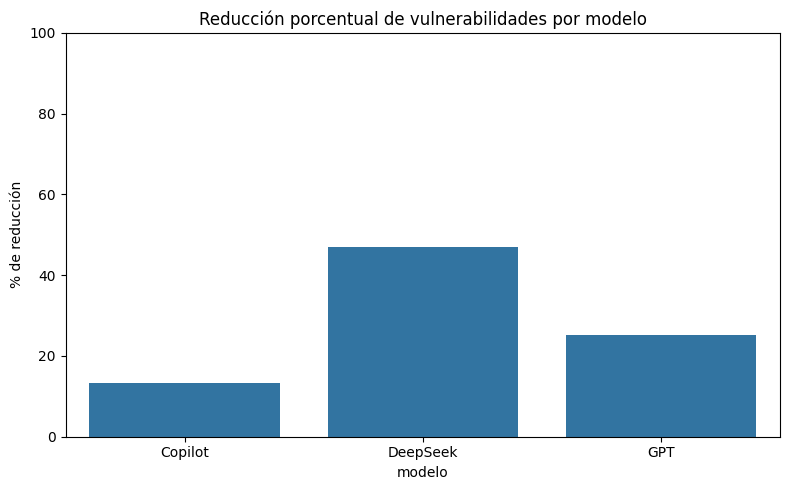

In [111]:
modelo_pivot = modelo_fase.pivot(index='modelo', columns='fase', values='conteo').fillna(0)
modelo_pivot['% reducción'] = ((modelo_pivot['inicial'] - modelo_pivot['correccion']) / modelo_pivot['inicial']) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=modelo_pivot.index, y=modelo_pivot['% reducción'])
plt.title('Reducción porcentual de vulnerabilidades por modelo')
plt.ylabel('% de reducción')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [115]:
modelo_lenguaje_fase = df_combinado.groupby(['modelo', 'Lenguaje', 'fase']).size().unstack(fill_value=0)
(modelo_lenguaje_fase)


fase               correccion  inicial
modelo   Lenguaje                     
Copilot  C                 76       88
         Python            66       76
DeepSeek C                 73      136
         Python            74      141
GPT      C                 63       79
         Python            58       83

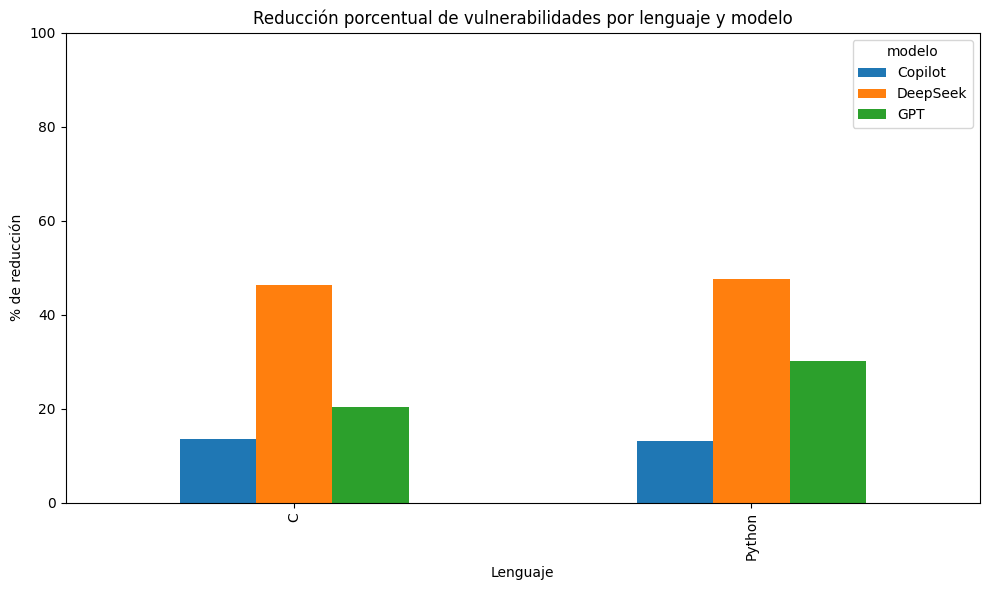

In [116]:
pivot = df_combinado.groupby(['Lenguaje', 'modelo', 'fase']).size().unstack(fill_value=0)
pivot['% reducción'] = ((pivot['inicial'] - pivot['correccion']) / pivot['inicial']) * 100

pivot['% reducción'].unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Reducción porcentual de vulnerabilidades por lenguaje y modelo')
plt.ylabel('% de reducción')
plt.xlabel('Lenguaje')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


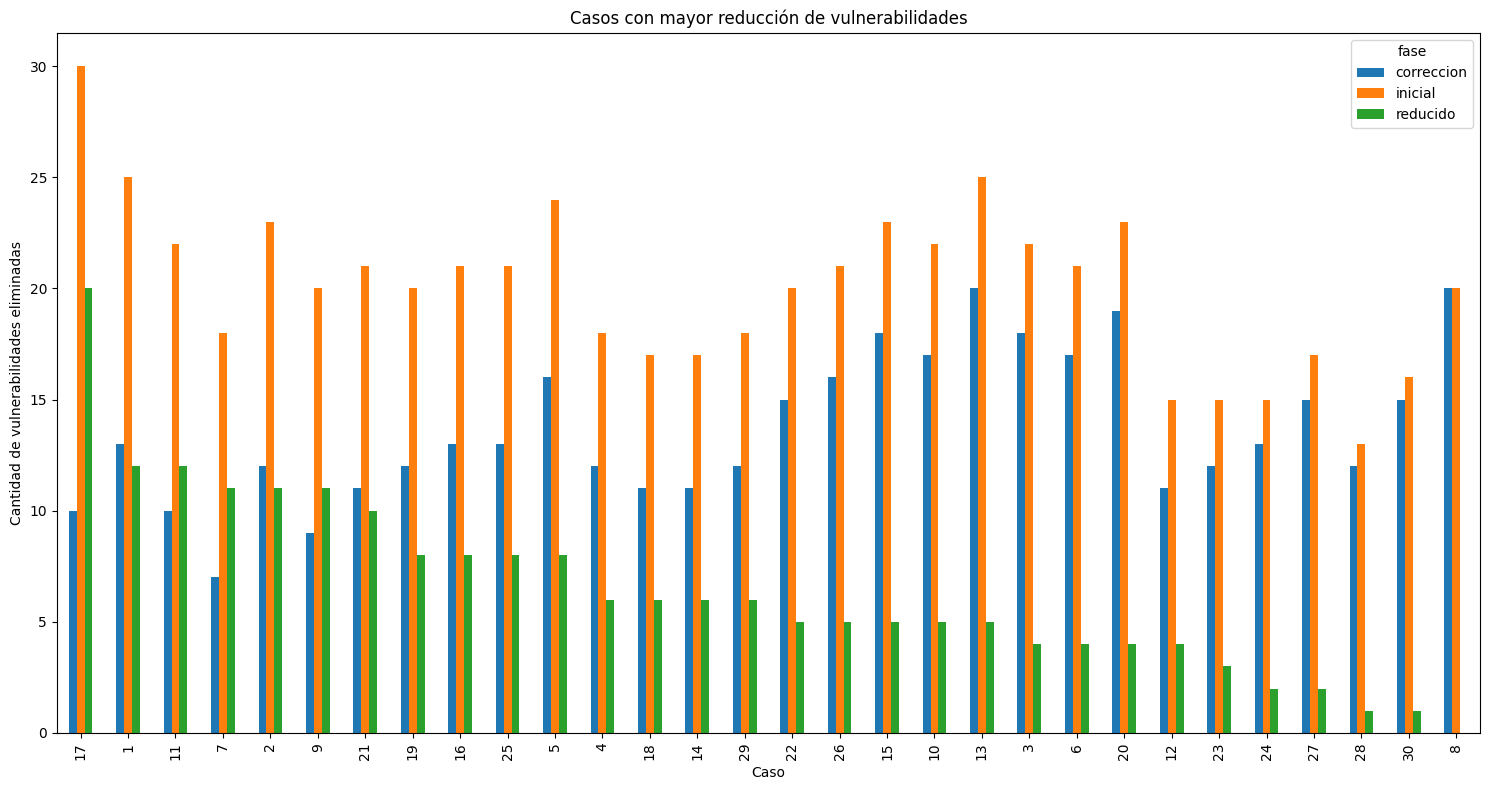

In [119]:
caso_fase = df_combinado.groupby(['Caso', 'fase']).size().unstack(fill_value=0)
caso_fase['reducido'] = caso_fase['inicial'] - caso_fase['correccion']
caso_fase.sort_values('reducido', ascending=False).plot(kind='bar', figsize=(15, 8))
plt.title('Casos con mayor reducción de vulnerabilidades')
plt.ylabel('Cantidad de vulnerabilidades eliminadas')
plt.tight_layout()
plt.show()


In [120]:
reduction_modelo = df_combinado.groupby(['modelo', 'fase']).size().unstack()
reduction_modelo['% reducción'] = ((reduction_modelo['inicial'] - reduction_modelo['correccion']) / reduction_modelo['inicial']) * 100
print(reduction_modelo.sort_values('% reducción', ascending=False))


fase      correccion  inicial  % reducción
modelo                                    
DeepSeek         147      277    46.931408
GPT              121      162    25.308642
Copilot          142      164    13.414634


In [121]:
persistencia_lenguaje = df_combinado.groupby(['Lenguaje', 'fase']).size().unstack()
persistencia_lenguaje['% persistencia'] = (persistencia_lenguaje['correccion'] / persistencia_lenguaje['inicial']) * 100
print(persistencia_lenguaje.sort_values('% persistencia', ascending=False))


fase      correccion  inicial  % persistencia
Lenguaje                                     
C                212      303       69.966997
Python           198      300       66.000000


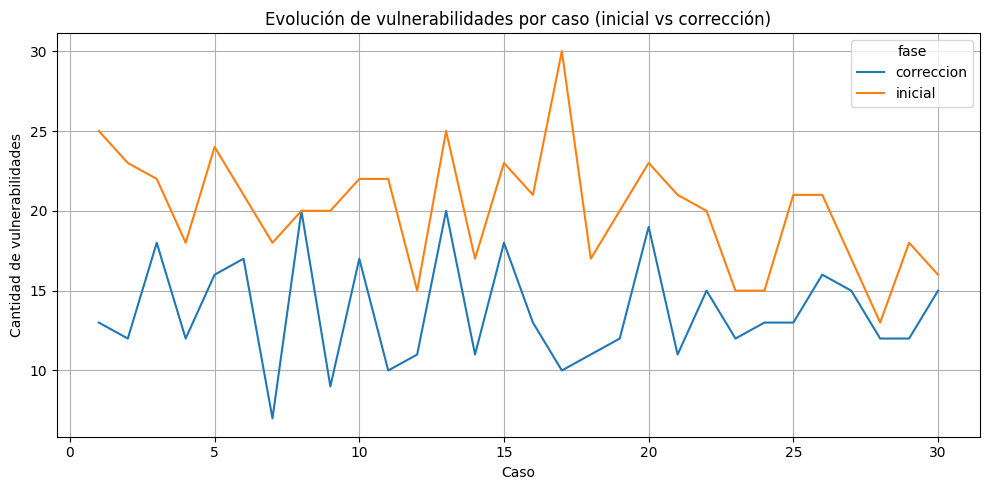

In [122]:
caso_evolucion = df_combinado.groupby(['Caso', 'fase']).size().unstack(fill_value=0)
caso_evolucion.plot(figsize=(10,5))
plt.title("Evolución de vulnerabilidades por caso (inicial vs corrección)")
plt.ylabel("Cantidad de vulnerabilidades")
plt.xlabel("Caso")
plt.grid(True)
plt.tight_layout()
plt.show()


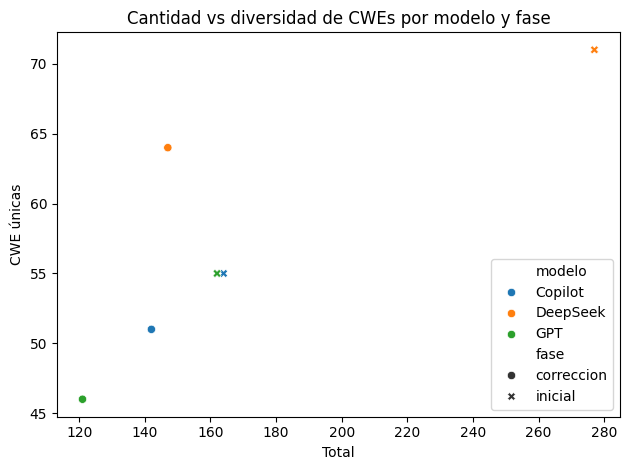

In [137]:
conteo = df_combinado.groupby(['modelo', 'fase']).size()
diversidad = df_combinado.groupby(['modelo', 'fase'])['CWE ID'].nunique()

df_dispersion = pd.concat([conteo, diversidad], axis=1)
df_dispersion.columns = ['Total', 'CWE únicas']

sns.scatterplot(data=df_dispersion.reset_index(), x='Total', y='CWE únicas', hue='modelo', style='fase')
plt.title("Cantidad vs diversidad de CWEs por modelo y fase")
plt.tight_layout()
plt.show()


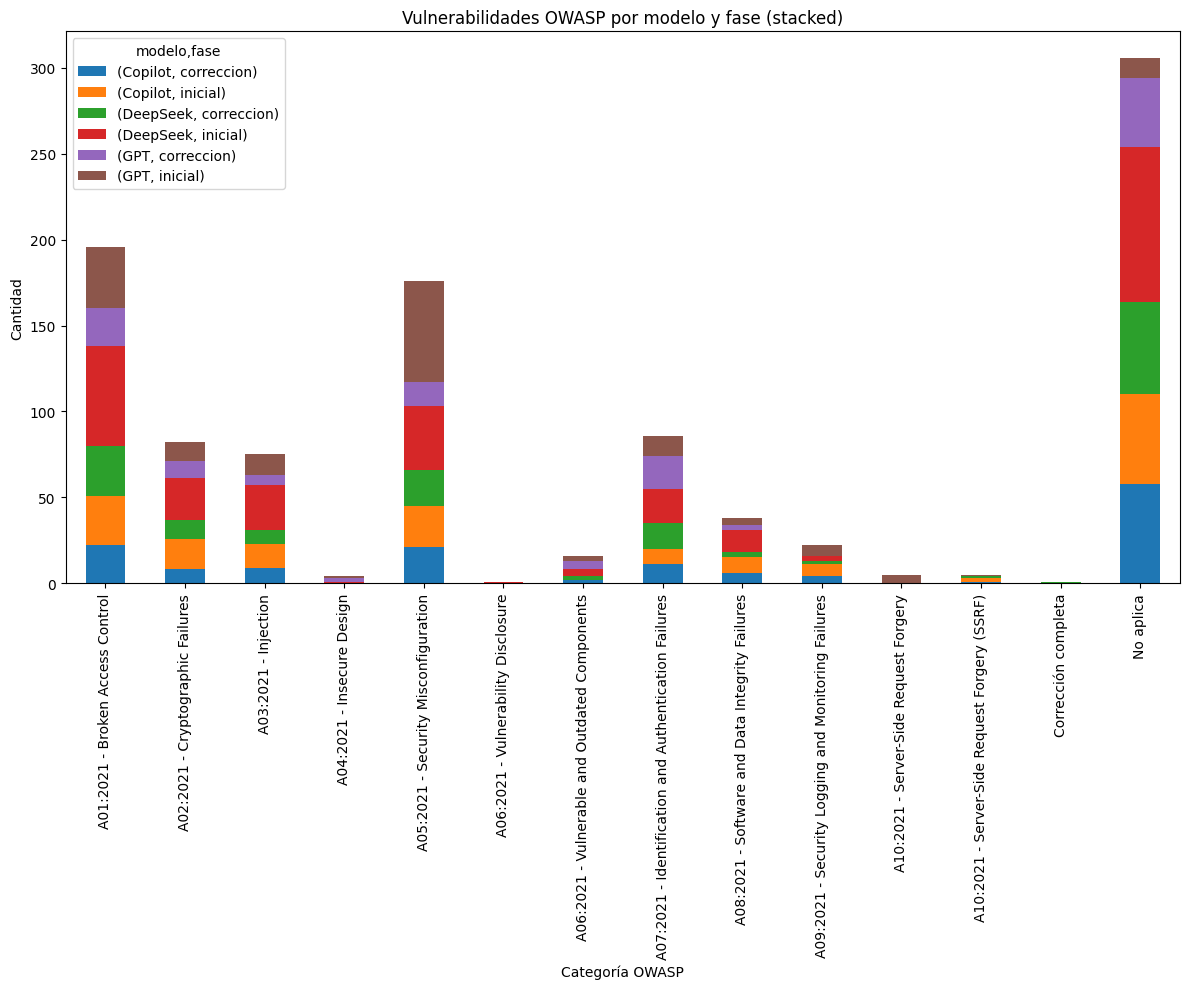

In [139]:
owasp_data = df_combinado.groupby(['modelo', 'fase', 'OWASP Top 10 (2021)']).size().unstack(fill_value=0)
owasp_data.T.plot(kind='bar', stacked=True, figsize=(12,10))
plt.title("Vulnerabilidades OWASP por modelo y fase (stacked)")
plt.xlabel("Categoría OWASP")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()


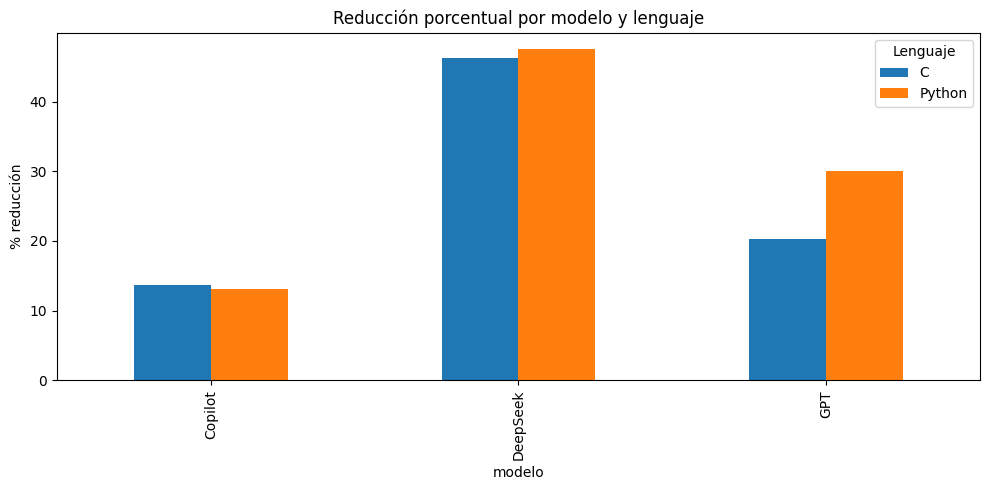

In [140]:
by_lang_model = df_combinado.groupby(['modelo', 'Lenguaje', 'fase']).size().unstack(fill_value=0)
by_lang_model['reducción absoluta'] = by_lang_model['inicial'] - by_lang_model['correccion']
by_lang_model['% reducción'] = (by_lang_model['reducción absoluta'] / by_lang_model['inicial']) * 100

by_lang_model['% reducción'].unstack().plot(kind='bar', figsize=(10,5))
plt.title('Reducción porcentual por modelo y lenguaje')
plt.ylabel('% reducción')
plt.tight_layout()
plt.show()


Como determino mejor modelos?
a. efectividad, menor cantidad de vulnerabilidades generadas y  capacidad de reduccion de vulnerabilidades
El mejor modelo tiene el % más alto de reducción.
El mejor modelo elimina más tipos distintos de CWE.
El mejor modelo no deberia introducir nuevas vulnerabilidades al corregir.
El mejor modelo tiene buen desempeño en ambos lenguajes.